In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip

Archive:  /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip
   creating: DATA_PICTURE_3D_Change/
   creating: DATA_PICTURE_3D_Change/picture_alpha/
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.3.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.4.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.3.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.4.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_vo

In [3]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential , Model
from keras.layers import Dense , Dropout , Conv2D , BatchNormalization , Flatten , Conv2DTranspose , Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import visualkeras
from sklearn.model_selection import train_test_split

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path_data = "/content/DATA_PICTURE_3D_Change"

store_data_set = {
					'picture_alpha':[] ,
					'picture_health' : [] ,
					'picture_void' : [] ,
					'picture_void_alpha' : []
				}

def function_conver_and_load_image() :
  for path in os.listdir(path_data) :
    print(path)
    cursur = None
    if path == 'picture_alpha' :
      cursur = 'picture_alpha'
    elif path == 'picture_health' :
      cursur = 'picture_health'
    elif path == 'picture_void' :
      cursur = 'picture_void'
    elif path == 'picture_void_alpha' :
      cursur = 'picture_void_alpha'

    for file in os.listdir(f'{path_data}/{path}') :
      combined_root = f'{path_data}/{path}/{file}'
      print(combined_root)
      df = pd.read_csv(combined_root)
      matrix_picture_z = []
      matrix_picture_y = []
      matrix_picture_x = []
      for index in range(len(df)) :
        value_z = df.iloc[index , 2 ]
        matrix_picture_z.append(value_z)
        value_y = df.iloc[index , 1 ]
        matrix_picture_y.append(value_y)
        value_x = df.iloc[index , 0 ]
        matrix_picture_x.append(value_x)

      matrix_picture_z = np.array(matrix_picture_z).reshape(16,3)
      matrix_picture_y = np.array(matrix_picture_y).reshape(16,3)
      matrix_picture_x = np.array(matrix_picture_x).reshape(16,3)

      matrix_picture = {'x':matrix_picture_x , 'y':matrix_picture_y , 'z':matrix_picture_z }
      store_data_set[cursur].append(matrix_picture)


  return store_data_set
store_data_set = function_conver_and_load_image()



picture_health
/content/DATA_PICTURE_3D_Change/picture_health/h_0.009_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.009_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.012_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.039_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.025_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.039_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.008_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.027_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.091_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.099_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.051_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.021_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.054_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_health/h_0.095_void_0.3.csv
/content/DATA_PICTURE_3D_Change/p

In [4]:
total_health_x_y_z , label_health = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_health' :
      total_health_x_y_z.append(img)
      label_health.append(i)


x_health , y_health , z_health = [] , [] , []

for i in total_health_x_y_z:
  x_health.append(i['x'])
  y_health.append(i['y'])
  z_health.append(i['z'])


x_health = np.array(x_health).reshape(-1 , 16 , 3 , 1 )
y_health = np.array(y_health).reshape(-1 , 16 , 3 , 1 )
z_health = np.array(z_health).reshape(-1 , 16 , 3 , 1 )
z_health = np.where(z_health < 0 , 0 , z_health )

TOTAL_X_health_vector = []
TOTAL_Target_X_health_vector = []

window_size = 2
for picture in z_health:
    picture_reshaped = picture.reshape(16, 3)  # 16 ردیف، هر ردیف 3 ستون (x,y,z)
    n_samples = picture_reshaped.shape[0] - window_size
    for i in range(n_samples):
        # ورودی = 3 ردیف پشت سر هم
        TOTAL_X_health_vector.append(picture_reshaped[i : i + window_size])   # (3,3)
        # خروجی = ردیف بعد از این 3 تایی
        TOTAL_Target_X_health_vector.append(picture_reshaped[i + window_size]) # (3,)

TOTAL_X_health_vector_array = np.array(TOTAL_X_health_vector).reshape(-1, window_size, 3)
TOTAL_Target_X_health_vector_array = np.array(TOTAL_Target_X_health_vector).reshape(-1, 3)

print(TOTAL_X_health_vector_array.shape)   # (N, 3, 3)
print(TOTAL_Target_X_health_vector_array.shape)  # (N, 3)

(5544, 2, 3)
(5544, 3)


In [5]:
x_train , x_test , y_train , y_test = train_test_split(TOTAL_X_health_vector_array,TOTAL_Target_X_health_vector_array , test_size=0.3 , random_state = 42 )

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ————— تعریف مدل —————
model = Sequential([
    # لایه LSTM: 4 واحد پنهان، فقط خروجی نهایی را باز می‌گرداند
    LSTM(64, input_shape=(2, 3), return_sequences=False),
    # برای کاهش بیش‌برازش، کمی Dropout
    Dropout(0.2),
    # یک لایه میانی برای افزایش ظرفیت غیرخطی مدل
    Dense(16, activation='relu'),
    # لایه خروجی با 3 نورون (برای هر feature یک مقدار)
    Dense(3)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)
model.summary()

# ————— تنظیم EarlyStopping —————
es = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

# ————— آموزش مدل —————
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    # callbacks=[es],
    verbose=2
)

# ————— پیش‌بینی —————
# مثال: پیش‌بینی برای آخرین دو سطر
x_new = x_train[-1][np.newaxis, ...]      # شکل (1,2,3)
y_pred = model.predict(x_new)       # شکل (1,3)
print("پیش‌بینی:", y_pred[0])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,499 (72.26 KB)

 Trainable params: 18,499 (72.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
49/49 - 3s - 53ms/step - loss: 3.0499 - mse: 3.0499 - val_loss: 0.4668 - val_mse: 0.4668
Epoch 2/50
49/49 - 0s - 5ms/step - loss: 0.1502 - mse: 0.1502 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 3/50
49/49 - 0s - 5ms/step - loss: 0.0747 - mse: 0.0747 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 4/50
49/49 - 0s - 5ms/step - loss: 0.0677 - mse: 0.0677 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 5/50
49/49 - 0s - 5ms/step - loss: 0.0607 - mse: 0.0607 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 6/50
49/49 - 0s - 5ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 7/50
49/49 - 0s - 5ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 8/50
49/49 - 0s - 5ms/step - loss: 0.0547 - mse: 0.0547 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 9/50
49/49 - 0s - 5ms/step - loss: 0.0517 - mse: 0.0517 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 10/50
49/49 - 0s - 5ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 11

In [29]:
Total_Feature = []
Total_Label_Feature = []

In [ ]:
# TOTAL_SEQ_ERROR_HEALTH = []
# window_size = 2

# for picture in z_health[::4]:
#     picture_reshaped = picture.reshape(16, 3)
#     n_samples = picture_reshaped.shape[0] - window_size

#     # ساخت دیتای ورودی/خروجی
#     new_sample_x, new_sample_y = [], []
#     for i in range(n_samples):
#         new_sample_x.append(picture_reshaped[i : i + window_size])
#         new_sample_y.append(picture_reshaped[i + window_size])

#     new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
#     new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

#     # پیش‌بینی کل توالی
#     total_y_pre = []
#     for i in new_sample_x_array:
#         t = np.expand_dims(i, axis=0)   # (1, window_size, 3)
#         y_pre = model.predict(t, verbose=0)
#         total_y_pre.append(y_pre[0])
#     total_y_pre = np.array(total_y_pre)

#     # -------- خطای وزن‌دار --------
#     errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)



#     avg_error = np.mean(errors)       # میانگین کل
#     last_error = errors[-1]           # آخرین فریم
#     tail_mean = np.mean(errors[-3:])
#     tail_size = 5
#     tail_mean = np.mean(errors[-tail_size:]) if tail_size <= len(errors) else avg_error
#     ratio_tail = tail_mean / (avg_error + 1e-12)

#     threshold_factor = 1.5

#     penalty = 0.0
#     multiplier = 5.0

#     clip_penalty=True
#     max_penalty=0.5

#     if ratio_tail > threshold_factor:
#         # گزینه ساده: جریمه متناسب با اختلاف
#         penalty = multiplier * (tail_mean - avg_error)
#         # یا می‌توان از درصدی از mean_error استفاده کرد:
#         # penalty = multiplier * mean_error * (ratio_tail - threshold_factor)

#         if clip_penalty:
#             penalty = np.clip(penalty, 0.0, max_penalty)

#     # مقدار MSE پایه (میانگین خطا)
#     base_mse = avg_error

#     # مقدار نهایی: اضافه کردن جریمه (می‌توان جمع، یا ضرب یا max بین دو مقدار را استفاده کرد)
#     augmented_mse = base_mse + penalty



#     features = {
#         "mean": np.mean(errors),
#         "max": np.max(errors),
#         "std": np.std(errors),
#         "last": errors[-1],
#         "ratio": np.max(errors) / (np.mean(errors) + 1e-8) ,
#         "penalty": penalty
#     }

#     Total_Feature.append([features["mean"], features["max"], features["std"], features["last"], features["ratio"] , features["penalty"] , augmented_mse ])
#     Total_Label_Feature.append('0')

# # print("میانگین خطای توالی سالم:", np.mean(TOTAL_SEQ_ERROR_HEALTH))

In [51]:
TOTAL_ERROR_PLAIN_HEALTH = []
TOTAL_SEQ_ERROR_HEALTH = []
Total_Feature = []
Total_Label_Feature = []

window_size = 2
tail_size = 5         # تعداد فریم‌های انتهایی
tail_weight = 3.0     # وزن برای خطای انتهایی
slope_weight = 2.0    # وزن برای شیب انتهایی

for picture in z_health[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    # ساخت دیتای ورودی/خروجی
    new_sample_x, new_sample_y = [], []
    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])
        new_sample_y.append(picture_reshaped[i + window_size])

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    # پیش‌بینی کل توالی
    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)   # (1, window_size, 3)
        y_pre = model.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)


    diff_error = (total_y_pre - new_sample_y_array) ** 2
    TOTAL_ERROR_PLAIN_HEALTH.append(diff_error)
    # -------- محاسبه خطا --------
    # errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)
    avg_error = np.mean(diff_error)
    mse = np.sum(diff_error)

    # -------- محاسبه خطای انتهایی --------
    # tail_errors = errors[-tail_size:] if tail_size <= len(errors) else errors
    # tail_mean = np.mean(tail_errors)

    # -------- شیب خطا --------
    # if len(tail_errors) > 1:
    #     slope = tail_errors[-1] - tail_errors[0]
    #     slope_penalty = max(slope, 0.0)
    # else:
    #     slope_penalty = 0.0

    # -------- محاسبه augmented_mse --------
    # augmented_mse = avg_error + tail_weight * tail_mean + slope_weight * slope_penalty

    # # -------- استخراج ویژگی‌ها --------
    features = {
        "mse": mse ,
        "mean": avg_error,
        "max": np.max(diff_error),
        "std": np.std(diff_error),
        "last": diff_error[-1],
        "min":np.min(diff_error),

    }

    Total_Feature.append([
        features["mse"] ,
        features["mean"],
        features["max"],
        features["std"],
        features["last"],
        features["min"],

    ])
    Total_Label_Feature.append('0')


In [52]:
TOTAL_ERROR_PLAIN_HEALTH[0].shape

(14, 3)

In [62]:
TOTAL_ERROR_PLAIN_HEALTH[0]

array([[8.51535942e-04, 5.03523489e-04, 3.67907978e-06],
       [4.56160186e-04, 2.63115268e-04, 3.02749693e-05],
       [4.73248522e-03, 4.47749363e-03, 4.12007299e-04],
       [1.04560750e-03, 4.89976671e-04, 3.86791816e-03],
       [2.59143623e-04, 2.06352242e-05, 1.03608381e-03],
       [1.15773832e-02, 8.71235810e-03, 2.24624711e-03],
       [1.88699022e-02, 5.60583549e-03, 6.60531244e-03],
       [2.29607320e-03, 1.52315632e-04, 7.58243668e-06],
       [8.25940391e-03, 5.83535330e-03, 2.23585159e-02],
       [3.93690189e-02, 1.87911414e-03, 1.74173395e-02],
       [6.14822994e-02, 6.25259724e-03, 3.48034181e-02],
       [4.27871119e-03, 2.57786835e-02, 2.21327094e-01],
       [3.55672156e-02, 1.32983775e-01, 2.03765757e-02],
       [2.25932976e-04, 3.60794477e-02, 8.61855708e-05]])

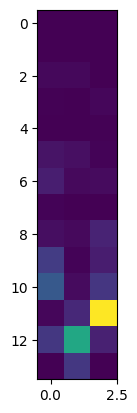

In [61]:
plt.imshow(TOTAL_ERROR_PLAIN_HEALTH[0])
plt.show()

In [53]:
len(TOTAL_ERROR_PLAIN_HEALTH)

99

In [54]:
TOTAL_ERROR_PLAIN_ALPHA = []
total_alpha_x_y_z , label_alpha = [] , []
for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_alpha':
            total_alpha_x_y_z.append(img)
            label_alpha.append(i)

x_alpha , y_alpha , z_alpha = [] , [] , []
for i in total_alpha_x_y_z:
    x_alpha.append(i['x'])
    y_alpha.append(i['y'])
    z_alpha.append(i['z'])

x_alpha = np.array(x_alpha).reshape(-1 , 16 , 3 , 1 )
y_alpha = np.array(y_alpha).reshape(-1 , 16 , 3 , 1 )
z_alpha = np.array(z_alpha).reshape(-1 , 16 , 3 , 1 )
z_alpha = np.where(z_alpha < 0 , 0 , z_alpha )

TOTAL_SEQ_ERROR_ALPHA = []
r = 0

for picture in z_alpha[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    new_sample_x, new_sample_y = [], []
    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])
        new_sample_y.append(picture_reshaped[i + window_size])

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)
        y_pre = model.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)
    diff_error = (total_y_pre - new_sample_y_array)**2
    TOTAL_ERROR_PLAIN_ALPHA.append(diff_error)
    avg_error = np.mean(diff_error)
    mse = np.sum(diff_error)

    # -------- خطای وزن‌دار --------
    # errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)


    # # -------- خطای وزن‌دار --------
    # errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)

    # avg_error = np.mean(errors)       # میانگین کل
    # last_error = errors[-1]           # آخرین فریم
    # tail_mean = np.mean(errors[-3:])
    # tail_size = 5
    # tail_mean = np.mean(errors[-tail_size:]) if tail_size <= len(errors) else avg_error
    # ratio_tail = tail_mean / (avg_error + 1e-12)

    # threshold_factor = 1.5

    # penalty = 0.0
    # multiplier = 5.0

    # clip_penalty=True
    # max_penalty=0.5

    # if ratio_tail > threshold_factor:
    #     # گزینه ساده: جریمه متناسب با اختلاف
    #     penalty = multiplier * (tail_mean - avg_error)
    #     # یا می‌توان از درصدی از mean_error استفاده کرد:
    #     # penalty = multiplier * mean_error * (ratio_tail - threshold_factor)

    #     if clip_penalty:
    #         penalty = np.clip(penalty, 0.0, max_penalty)

    # # مقدار MSE پایه (میانگین خطا)
    # base_mse = avg_error

    # # مقدار نهایی: اضافه کردن جریمه (می‌توان جمع، یا ضرب یا max بین دو مقدار را استفاده کرد)
    # augmented_mse = base_mse + penalty








    features = {
        "mse":mse,
        "mean": avg_error,
        "max": np.max(diff_error),
        "std": np.std(diff_error),
        "last": diff_error[-1],
        "min":np.min(diff_error)
    }

    Total_Feature.append([
        features["mse"] ,
        features["mean"],
        features["max"],
        features["std"],
        features["last"],
        features["min"],
    ])
    Total_Label_Feature.append('1')

    r += 1
    del new_sample_x, new_sample_y, new_sample_x_array, new_sample_y_array, total_y_pre, picture_reshaped

print("تعداد تصاویر پردازش‌شده:", r)
# print("میانگین خطای توالی معیوب α:", np.mean(TOTAL_SEQ_ERROR_ALPHA))


تعداد تصاویر پردازش‌شده: 99


In [55]:
TOTAL_ERROR_PLAIN_VOID = []
total_void_x_y_z, label_void = [], []
for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_void':
            total_void_x_y_z.append(img)
            label_void.append(i)

x_void, y_void, z_void = [], [], []
for i in total_void_x_y_z:
    x_void.append(i['x'])
    y_void.append(i['y'])
    z_void.append(i['z'])

x_void = np.array(x_void).reshape(-1, 16, 3, 1)
y_void = np.array(y_void).reshape(-1, 16, 3, 1)
z_void = np.array(z_void).reshape(-1, 16, 3, 1)
z_void = np.where(z_void<0,0,z_void)

TOTAL_SEQ_ERROR_VOID = []

for picture in z_void[::4]:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    new_sample_x, new_sample_y = [], []
    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])
        new_sample_y.append(picture_reshaped[i + window_size])

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)
        y_pre = model.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])
    total_y_pre = np.array(total_y_pre)

    diff_error = (total_y_pre - new_sample_y_array) ** 2
    TOTAL_ERROR_PLAIN_VOID.append(diff_error)
    mse = np.sum(diff_error)

    # # -------- خطای وزن‌دار --------
    # errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)
    # avg_error = np.mean(errors)       # میانگین کل
    # last_error = errors[-1]           # آخرین فریم
    # tail_mean = np.mean(errors[-3:])
    # tail_size = 5
    # tail_mean = np.mean(errors[-tail_size:]) if tail_size <= len(errors) else avg_error
    # ratio_tail = tail_mean / (avg_error + 1e-12)

    # threshold_factor = 1.5

    # penalty = 0.0
    # multiplier = 5.0

    # clip_penalty=True
    # max_penalty=0.5

    # if ratio_tail > threshold_factor:
    #     # گزینه ساده: جریمه متناسب با اختلاف
    #     penalty = multiplier * (tail_mean - avg_error)
    #     # یا می‌توان از درصدی از mean_error استفاده کرد:
    #     # penalty = multiplier * mean_error * (ratio_tail - threshold_factor)

    #     if clip_penalty:
    #         penalty = np.clip(penalty, 0.0, max_penalty)

    # # مقدار MSE پایه (میانگین خطا)
    # base_mse = avg_error

    # # مقدار نهایی: اضافه کردن جریمه (می‌توان جمع، یا ضرب یا max بین دو مقدار را استفاده کرد)
    # augmented_mse = base_mse + penalty






    features = {
        "mse":mse,
        "mean": avg_error,
        "max": np.max(diff_error),
        "std": np.std(diff_error),
        "last": diff_error[-1],
        "min":np.min(diff_error)
    }
    Total_Feature.append([
        features["mse"],
        features["mean"],
        features["max"],
        features["std"],
        features["last"],
        features["min"],
    ])
    Total_Label_Feature.append('2')

# print("میانگین خطای توالی معیوب void:", np.mean(TOTAL_SEQ_ERROR_VOID))

In [56]:
TOTAL_ERROR_PLAIN_VOID_ALPHA = []
total_void_alpha_x_y_z, label_void_alpha = [], []

for i in store_data_set:
    for img in store_data_set[i]:
        if i == 'picture_void_alpha':
            total_void_alpha_x_y_z.append(img)
            label_void_alpha.append(i)

x_void_alpha, y_void_alpha, z_void_alpha = [], [], []

for i in total_void_alpha_x_y_z:
    x_void_alpha.append(i['x'])
    y_void_alpha.append(i['y'])
    z_void_alpha.append(i['z'])

x_void_alpha = np.array(x_void_alpha).reshape(-1, 16, 3, 1)
y_void_alpha = np.array(y_void_alpha).reshape(-1, 16, 3, 1)
z_void_alpha = np.array(z_void_alpha).reshape(-1, 16, 3, 1)
z_void_alpha = np.where(z_void_alpha<0,0,z_void_alpha)

# ---------------------------
# ساخت دیتاست ورودی/خروجی
# ---------------------------
TOTAL_X_vector_void_alpha = []
TOTAL_Y_vector_void_alpha = []

window_size = 2   # سه ردیف ورودی

for picture in z_void_alpha:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size
    for i in range(n_samples):
        TOTAL_X_vector_void_alpha.append(picture_reshaped[i : i + window_size])   # (3,3)
        TOTAL_Y_vector_void_alpha.append(picture_reshaped[i + window_size])       # (3,)

TOTAL_X_vector_void_alpha_array = np.array(TOTAL_X_vector_void_alpha).reshape(-1, window_size, 3)
TOTAL_Y_vector_void_alpha_array = np.array(TOTAL_Y_vector_void_alpha).reshape(-1, 3)

# ---------------------------
# پیش‌بینی و محاسبه خطا
# ---------------------------
r = 0
TOTAL_MSE_void_alpha = []

for picture in z_void_alpha[::4]:
    new_sample_x, new_sample_y = [], []

    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    for i in range(n_samples):
        new_sample_x.append(picture_reshaped[i : i + window_size])   # (3,3)
        new_sample_y.append(picture_reshaped[i + window_size])       # (3,)

    new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
    new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

    total_y_pre = []
    for i in new_sample_x_array:
        t = np.expand_dims(i, axis=0)   # (1, 3, 3)
        y_pre = model.predict(t, verbose=0)
        total_y_pre.append(y_pre[0])

    total_y_pre = np.array(total_y_pre)

    diff_error = (total_y_pre - new_sample_y_array)**2
    TOTAL_ERROR_PLAIN_VOID_ALPHA.append(diff_error)
    mse = np.sum(diff_error)
    # ---------------------------
    # محاسبه خطا (MAE یا MSE)
    # ---------------------------

#     errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)

#     avg_error = np.mean(errors)       # میانگین کل
#     last_error = errors[-1]           # آخرین فریم
#     tail_mean = np.mean(errors[-3:])
#     tail_size = 5
#     tail_mean = np.mean(errors[-tail_size:]) if tail_size <= len(errors) else avg_error
#     ratio_tail = tail_mean / (avg_error + 1e-12)

#     threshold_factor = 1.5

#     penalty = 0.0
#     multiplier = 5.0

#     clip_penalty=True
#     max_penalty=0.5

#     if ratio_tail > threshold_factor:
#         # گزینه ساده: جریمه متناسب با اختلاف
#         penalty = multiplier * (tail_mean - avg_error)
#         # یا می‌توان از درصدی از mean_error استفاده کرد:
#         # penalty = multiplier * mean_error * (ratio_tail - threshold_factor)

#         if clip_penalty:
#             penalty = np.clip(penalty, 0.0, max_penalty)

#     # مقدار MSE پایه (میانگین خطا)
#     base_mse = avg_error

#     # مقدار نهایی: اضافه کردن جریمه (می‌توان جمع، یا ضرب یا max بین دو مقدار را استفاده کرد)
#     augmented_mse = base_mse + penalty



    features = {
        "mse":mse,
        "mean": avg_error,
        "max": np.max(diff_error),
        "std": np.std(diff_error),
        "last": diff_error[-1],
        "min":np.min(diff_error)
    }
    Total_Feature.append([
        features["mse"] ,
        features["mean"],
        features["max"],
        features["std"],
        features["last"],
        features["min"],
    ])
    Total_Label_Feature.append('3')

    r += 1
    if r == 200:
        break

print("تعداد تصاویر پردازش‌شده:", r)


تعداد تصاویر پردازش‌شده: 99


In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def fit_surface(x, y, z, degree=2):
    # x, y, z به صورت بردار
    XY = np.vstack([x, y]).T
    poly = PolynomialFeatures(degree)
    XY_poly = poly.fit_transform(XY)

    model = LinearRegression()
    model.fit(XY_poly, z)

    return model, poly

# استفاده
x = np.random.uniform(50, 330, 500)
y = np.random.uniform(0, 15, 500)
z = 0.001*x + 0.05*y + np.random.normal(0,0.01,500)  # خطای نمونه

model, poly = fit_surface(x, y, z, degree=2)

# پیش‌بینی سطح
grid_x, grid_y = np.meshgrid(np.linspace(50,330,50), np.linspace(0,15,20))
grid_XY = np.vstack([grid_x.ravel(), grid_y.ravel()]).T
grid_XY_poly = poly.transform(grid_XY)
grid_z = model.predict(grid_XY_poly).reshape(grid_x.shape)


In [15]:
TOTAL_ERROR_PLAIN_ALPHA[0].shape

(14, 3)

In [57]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# def plot_error_surface(error_surface, title="Error Surface"):
#     # error_surface شکلش (14, 3) هست

#     nx, ny = error_surface.shape

#     x = np.arange(nx)   # طول (0..13)
#     y = np.arange(ny)   # عرض (0..2)

#     X, Y = np.meshgrid(x, y, indexing="ij")  # meshgrid با شکل (14,3)
#     Z = error_surface  # خود خطا

#     fig = plt.figure(figsize=(8,6))
#     ax = fig.add_subplot(111, projection='3d')

#     surf = ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="k")
#     surf = ax.plot_wireframe(X, Y, Z, color='green')

#     ax.set_xlabel("Length (x)")
#     ax.set_ylabel("Width (y)")
#     ax.set_zlabel("Error (z)")
#     ax.set_title(title)
#     fig.colorbar(surf, shrink=0.5, aspect=5)

#     plt.show()


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

def plot_error_surface(error_surface, title="Error Surface"):
    nx, ny = error_surface.shape

    x = np.arange(nx)   # طول (0..13)
    y = np.arange(ny)   # عرض (0..2)

    X, Y = np.meshgrid(x, y, indexing="ij")
    Z = error_surface

    # نقاط اولیه
    points = np.column_stack([X.ravel(), Y.ravel()])
    values = Z.ravel()

    # شبکه ریزتر برای نرمی
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    XI, YI = np.meshgrid(xi, yi)

    ZI = griddata(points, values, (XI, YI), method='cubic')

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(XI, YI, ZI, cmap="viridis", linewidth=0, antialiased=True)

    ax.set_xlabel("Length (x)")
    ax.set_ylabel("Width (y)")
    ax.set_zlabel("Error (z)")
    ax.set_title(title)
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()


In [96]:
import numpy as geek

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

def multi_plot_error_surface(error_surface1 , error_surface2 , error_surface3 , error_surface4 , title=["health","alpha","void","void_alpha"]):
    nx, ny = error_surface1.shape

    x = np.arange(nx)   # طول (0..13)
    y = np.arange(ny)   # عرض (0..2)

    X, Y = np.meshgrid(x, y, indexing="ij")
    Z1 = error_surface1
    Z2 = error_surface2
    Z3 = error_surface3
    Z4 = error_surface4

    # نقاط اولیه
    points = np.column_stack([X.ravel(), Y.ravel()])
    values1 = Z1.ravel()
    values2 = Z2.ravel()
    values3 = Z3.ravel()
    values4 = Z4.ravel()

    # شبکه ریزتر برای نرمی
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    XI, YI = np.meshgrid(xi, yi)

    ZI = griddata(points, values1, (XI, YI), method='cubic')
    ZII = griddata(points, values2, (XI, YI), method='cubic')
    ZIII = griddata(points, values3, (XI, YI), method='cubic')
    ZIIII = griddata(points, values4, (XI, YI), method='cubic')

    fig = plt.figure(figsize=(12,20))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')
    ax3 = fig.add_subplot(221, projection='3d')
    ax4 = fig.add_subplot(222, projection='3d')

    surf1 = ax1.plot_surface(XI, YI, ZI, cmap="viridis", linewidth=0, antialiased=True)
    surf2 = ax2.plot_surface(XI, YI, ZII, cmap="viridis", linewidth=0, antialiased=True)
    surf3 = ax3.plot_surface(XI, YI, ZIII, cmap="viridis", linewidth=0, antialiased=True)
    surf4 = ax4.plot_surface(XI, YI, ZIIII, cmap="viridis", linewidth=0, antialiased=True)

    ax1.set_xlabel("Length (x)")
    ax1.set_ylabel("Width (y)")
    ax1.set_zlabel("Error (z)")
    ax1.set_title(title[0])

    ax2.set_xlabel("Length (x)")
    ax2.set_ylabel("Width (y)")
    ax2.set_zlabel("Error (z)")
    ax2.set_title(title[1])

    ax3.set_xlabel("Length (x)")
    ax3.set_ylabel("Width (y)")
    ax3.set_zlabel("Error (z)")
    ax3.set_title(title[2])

    ax4.set_xlabel("Length (x)")
    ax4.set_ylabel("Width (y)")
    ax4.set_zlabel("Error (z)")
    ax4.set_title(title[3])



    fig.colorbar(surf1, shrink=0.5, aspect=5)
    fig.colorbar(surf2, shrink=0.5, aspect=5)
    fig.colorbar(surf3, shrink=0.5, aspect=5)
    fig.colorbar(surf4, shrink=0.5, aspect=5)



    plt.show()

    print("*************** 2D ***************")

    fig2 = plt.figure(figsize=(10,10))
    ax21 = fig2.add_subplot(121)
    ax22 = fig2.add_subplot(122)
    ax23 = fig2.add_subplot(221)
    ax24 = fig2.add_subplot(222)

    error_surface1=geek.rot90(error_surface1)
    ax21.imshow(error_surface1)
    ax21.set_title("health")
    error_surface2=geek.rot90(error_surface2)
    ax22.imshow(error_surface2)
    ax22.set_title("alpha")
    error_surface3=geek.rot90(error_surface3)
    ax23.imshow(error_surface3)
    ax23.set_title("void")
    error_surface4=geek.rot90(error_surface4)
    ax24.imshow(error_surface4)
    ax24.set_title("void-alpha")


    plt.show()


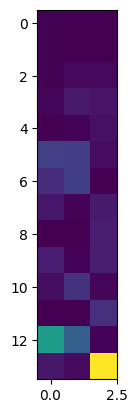

In [80]:
plt.imshow(TOTAL_ERROR_PLAIN_ALPHA[0])
plt.show()

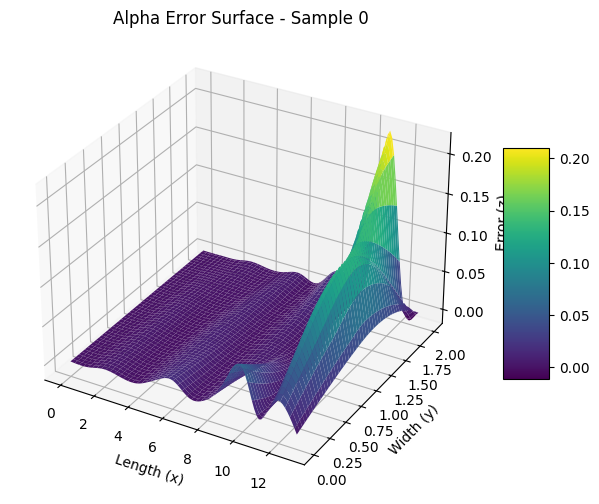

In [81]:
plot_error_surface(TOTAL_ERROR_PLAIN_HEALTH[0], title="Alpha Error Surface - Sample 0")

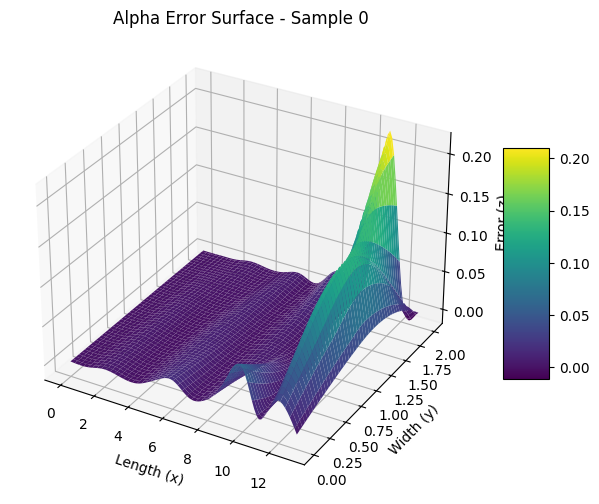

In [82]:
plot_error_surface(TOTAL_ERROR_PLAIN_HEALTH[0], title="Alpha Error Surface - Sample 0")

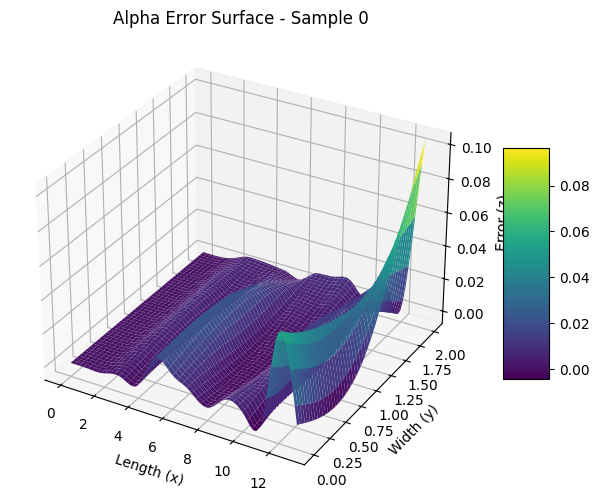

In [83]:
plot_error_surface(TOTAL_ERROR_PLAIN_ALPHA[0], title="Alpha Error Surface - Sample 0")

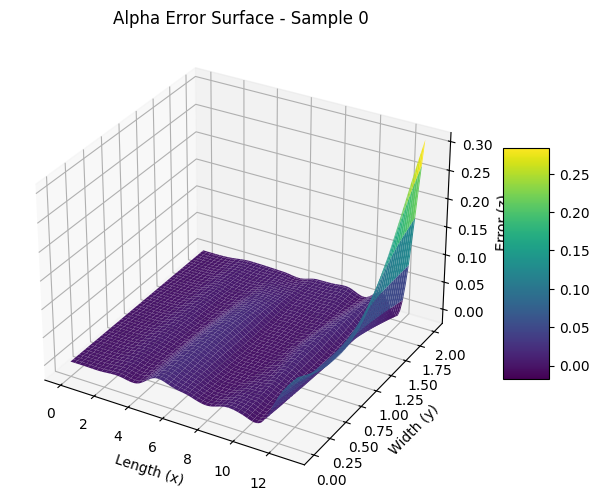

In [84]:
plot_error_surface(TOTAL_ERROR_PLAIN_VOID[0], title="Alpha Error Surface - Sample 0")

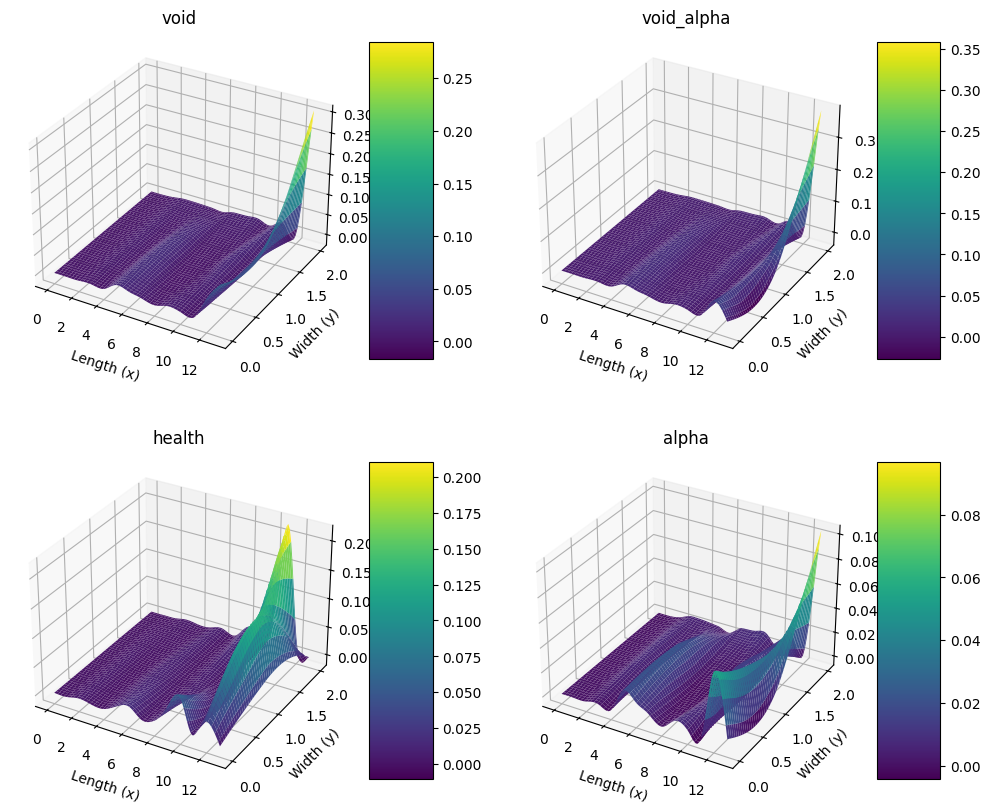

*************** 2D ***************


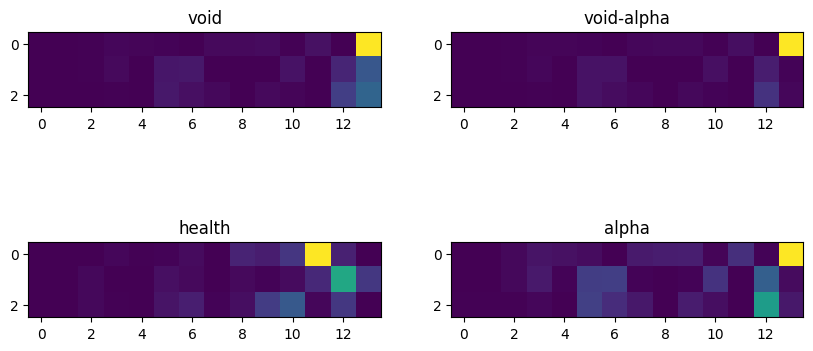

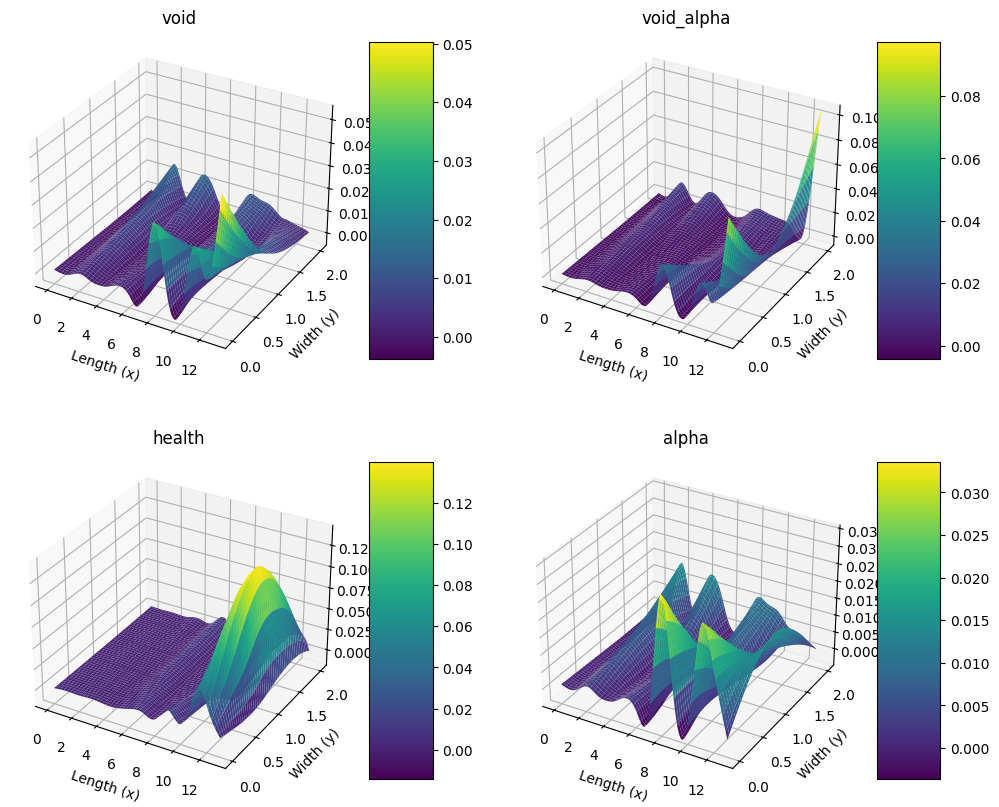

*************** 2D ***************


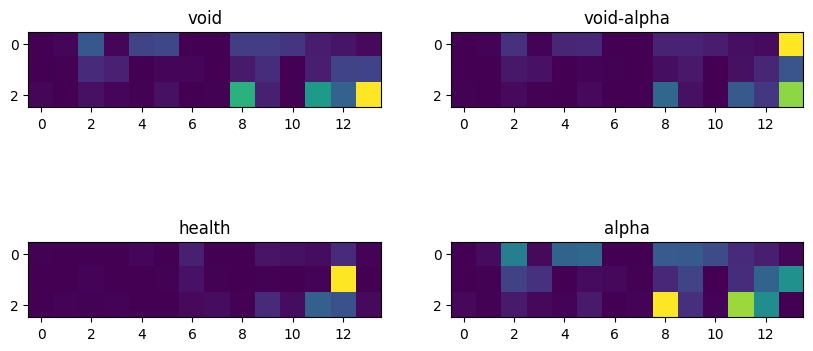

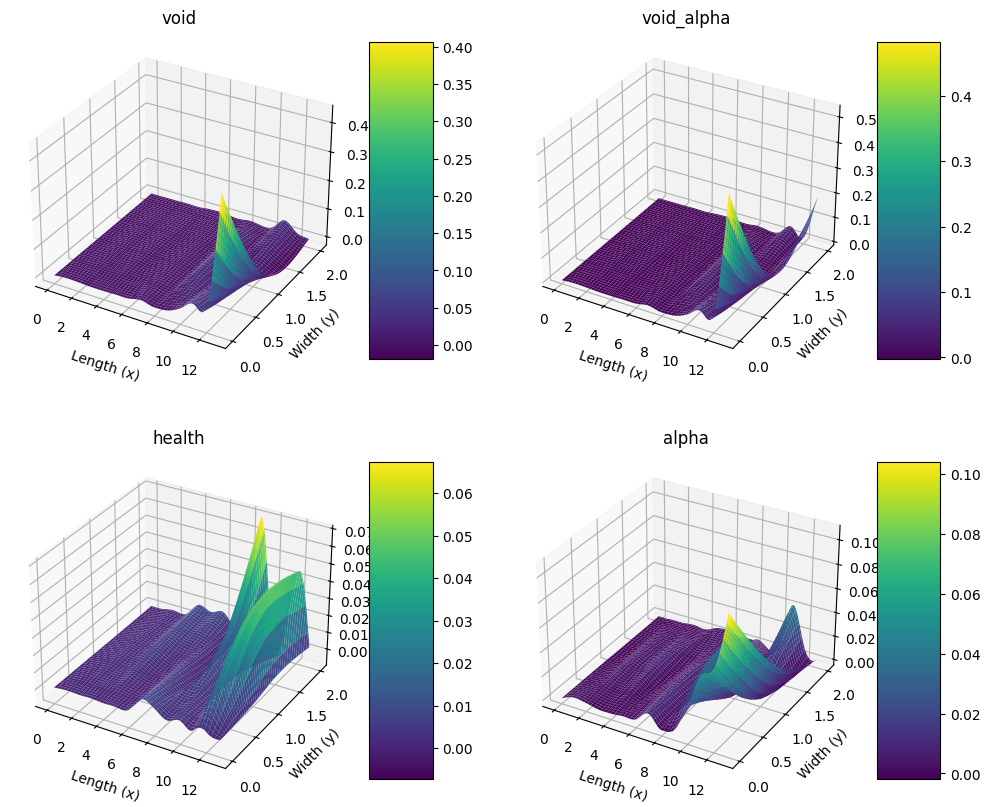

*************** 2D ***************


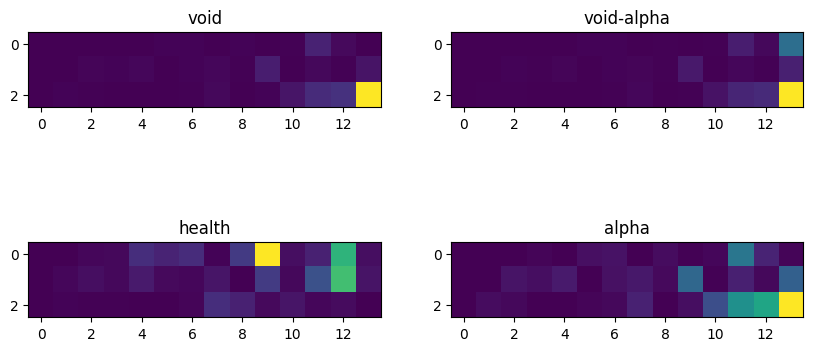

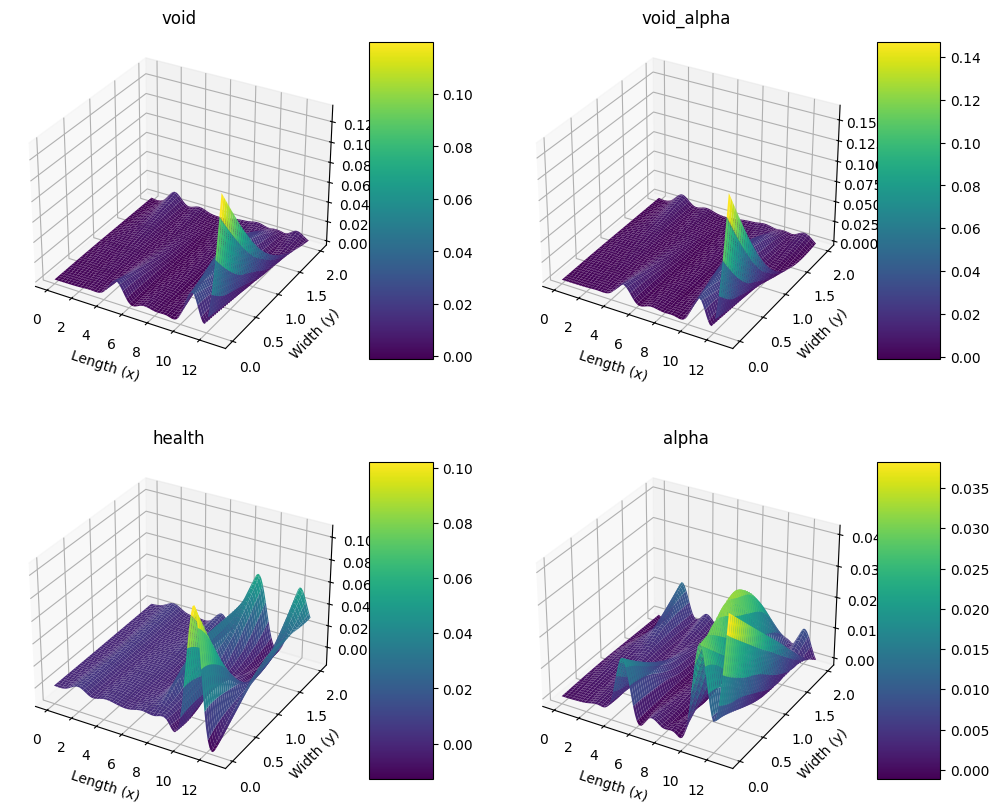

*************** 2D ***************


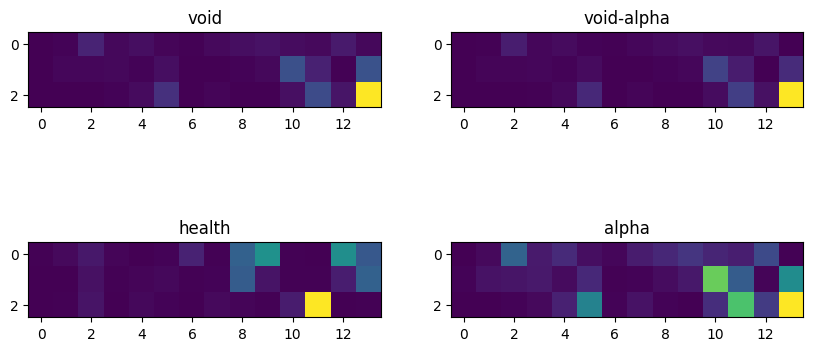

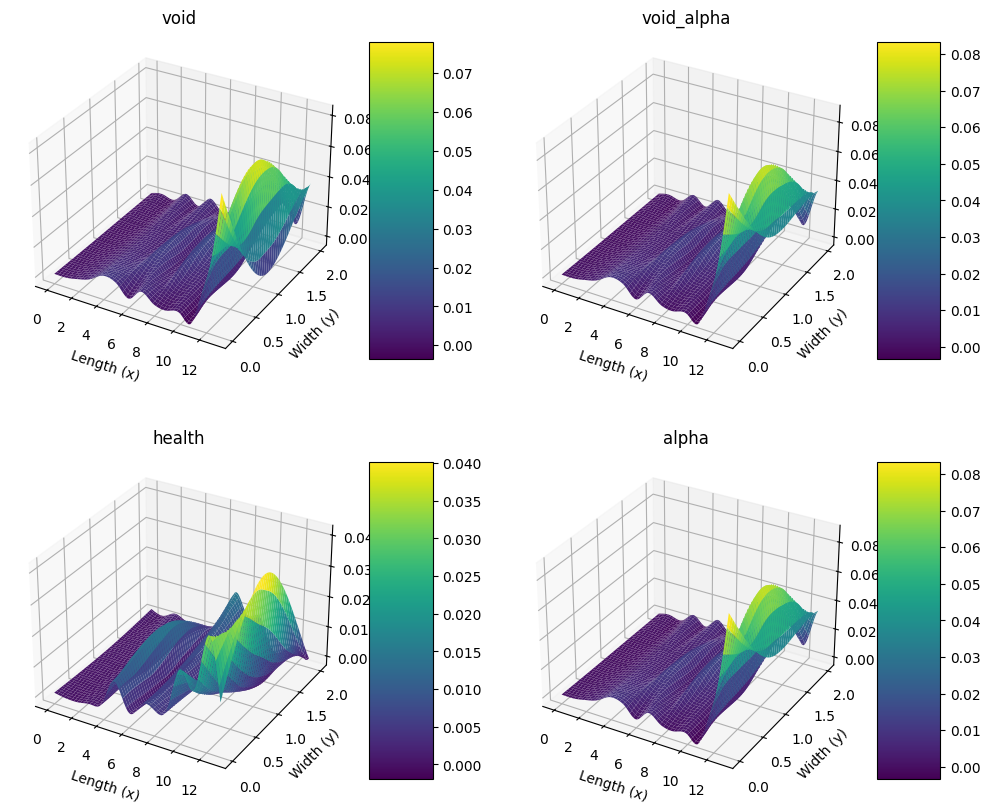

*************** 2D ***************


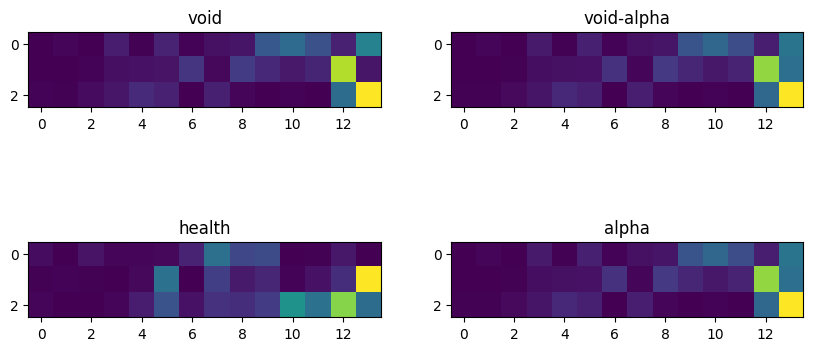

IndexError: list index out of range

In [98]:
j = 0
for i in range(len(TOTAL_ERROR_PLAIN_ALPHA)):
  multi_plot_error_surface(TOTAL_ERROR_PLAIN_HEALTH[j] ,TOTAL_ERROR_PLAIN_ALPHA[j] , TOTAL_ERROR_PLAIN_VOID[j] , TOTAL_ERROR_PLAIN_VOID_ALPHA[j] ,title=["health","alpha","void","void_alpha"])
  j += 20
  if i > 200:
    break

In [37]:
df = pd.DataFrame(Total_Feature , columns =["mse","mean" , "max" , "std" , "last" , "min"] )

In [38]:
df

,mse,mean,max,std,last,min
0,0.748883,0.002919,0.470454,0.133499,"[0.015031067031141987, -0.18994590737486128, 0...",-0.364669
1,0.479840,0.003922,0.253906,0.106815,"[-0.01249395778590312, -0.07815501607980835, -...",-0.237288
2,0.445786,0.000057,0.176774,0.103024,"[0.10745025447953616, 0.08750379297331268, -0....",-0.285325
3,0.378390,0.009002,0.232904,0.094489,"[-0.17085652864915968, 0.13890301393749027, 0....",-0.283677
4,0.516309,0.016836,0.269970,0.109588,"[0.06111982113986425, 0.1352253178102183, 0.02...",-0.240166
...,...,...,...,...,...,...
391,0.499068,0.003528,0.192667,0.108397,"[-0.17420229252965136, -0.3197279879355692, -0...",-0.319728
392,0.439832,0.003528,0.164734,0.101211,"[-0.17021425814821356, -0.4236683051069665, -0...",-0.423668
393,0.559401,0.003528,0.245729,0.114670,"[-0.2681738355583718, -0.1311482413057634, 0.2...",-0.268174
394,0.513458,0.003528,0.361053,0.110514,"[-0.16710815631502474, -0.005561010427925339, ...",-0.208109


In [39]:
df['label'] = Total_Label_Feature

In [40]:
df

,mse,mean,max,std,last,min,label
0,0.748883,0.002919,0.470454,0.133499,"[0.015031067031141987, -0.18994590737486128, 0...",-0.364669,0
1,0.479840,0.003922,0.253906,0.106815,"[-0.01249395778590312, -0.07815501607980835, -...",-0.237288,0
2,0.445786,0.000057,0.176774,0.103024,"[0.10745025447953616, 0.08750379297331268, -0....",-0.285325,0
3,0.378390,0.009002,0.232904,0.094489,"[-0.17085652864915968, 0.13890301393749027, 0....",-0.283677,0
4,0.516309,0.016836,0.269970,0.109588,"[0.06111982113986425, 0.1352253178102183, 0.02...",-0.240166,0
...,...,...,...,...,...,...,...
391,0.499068,0.003528,0.192667,0.108397,"[-0.17420229252965136, -0.3197279879355692, -0...",-0.319728,3
392,0.439832,0.003528,0.164734,0.101211,"[-0.17021425814821356, -0.4236683051069665, -0...",-0.423668,3
393,0.559401,0.003528,0.245729,0.114670,"[-0.2681738355583718, -0.1311482413057634, 0.2...",-0.268174,3
394,0.513458,0.003528,0.361053,0.110514,"[-0.16710815631502474, -0.005561010427925339, ...",-0.208109,3


In [41]:
df_health = df[df['label'] == '0']

In [42]:
df_health

,mse,mean,max,std,last,min,label
0,0.748883,0.002919,0.470454,0.133499,"[0.015031067031141987, -0.18994590737486128, 0...",-0.364669,0
1,0.479840,0.003922,0.253906,0.106815,"[-0.01249395778590312, -0.07815501607980835, -...",-0.237288,0
2,0.445786,0.000057,0.176774,0.103024,"[0.10745025447953616, 0.08750379297331268, -0....",-0.285325,0
3,0.378390,0.009002,0.232904,0.094489,"[-0.17085652864915968, 0.13890301393749027, 0....",-0.283677,0
4,0.516309,0.016836,0.269970,0.109588,"[0.06111982113986425, 0.1352253178102183, 0.02...",-0.240166,0
...,...,...,...,...,...,...,...
94,0.485715,-0.005802,0.328503,0.107382,"[-0.32357918311956, -0.11647745787868224, 0.07...",-0.323579,0
95,0.292525,0.004644,0.243292,0.083327,"[0.034687834694857145, 0.08672418221952594, 0....",-0.152517,0
96,0.335920,0.005539,0.202990,0.089260,"[-0.08206569494552873, 0.044512589960783444, -...",-0.254451,0
97,0.445835,-0.008690,0.153506,0.102663,"[-0.16607669211421872, 0.03629087878047077, 0....",-0.345043,0


In [44]:
df_fault_alpha = df[df['label'] == '1']

In [45]:
df_fault_void = df[df['label'] == '2']

In [46]:
df_fault_void_alpha = df[df['label'] == '3']

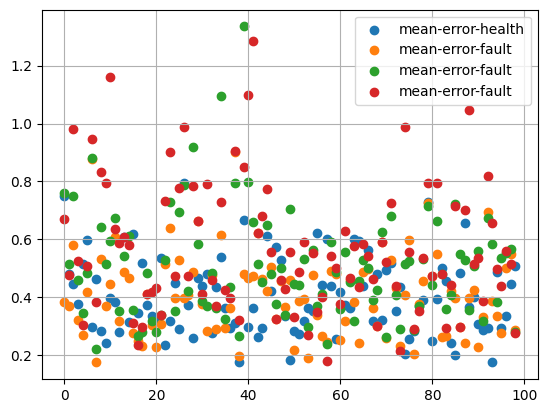

In [49]:
import matplotlib.pyplot as plt
plt.scatter(range(len(df_health)) , df_health['mse'] , label = 'mean-error-health')
plt.scatter(range(len(df_fault_alpha)) , df_fault_alpha['mse'] , label = 'mean-error-fault')
plt.scatter(range(len(df_fault_void)) , df_fault_void['mse'] , label = 'mean-error-fault')
plt.scatter(range(len(df_fault_void_alpha)) , df_fault_void_alpha['mse'] , label = 'mean-error-fault')
plt.legend()
plt.grid()
plt.show()

In [ ]:
df

,mean,max,std,last,ratio,penalty,augment_mse,label
0,0.053991,0.260637,0.073650,0.091126,4.827399,0.397207,0.451198,0
1,0.038880,0.138233,0.037891,0.054611,3.555394,0.141178,0.180058,0
2,0.037194,0.184770,0.048625,0.184770,4.967673,0.214231,0.251425,0
3,0.025801,0.129153,0.032281,0.033689,5.005698,0.151535,0.177336,0
4,0.034882,0.128110,0.039825,0.016559,3.672705,0.150992,0.185874,0
...,...,...,...,...,...,...,...,...
391,0.050988,0.359326,0.089361,0.359326,7.047212,0.327398,0.378386,1
392,0.042550,0.379470,0.094745,0.379470,8.918225,0.272451,0.315001,1
393,0.042434,0.128057,0.039944,0.128057,3.017772,0.122259,0.164693,1
394,0.030816,0.106653,0.029334,0.035981,3.460937,0.127691,0.158507,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y_label = df['label']
X = df.drop(['label'] , axis = 1 )

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , y_label , test_size = 0.3 , random_state= 42 )

In [ ]:
svc_model = SVC()
svc_model.fit(x_train , y_train )

SVC()

In [ ]:
y_pre = svc_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_pre , y_test ))

0.6890756302521008


In [ ]:
window_size = 2
tail_size = 5
tail_weight = 3.0
slope_weight = 2.0

Total_Feature = []
Total_Label_Feature = []

def process_group(data, label):
    for picture in data[::4]:
        picture_reshaped = picture.reshape(16, 3)
        n_samples = picture_reshaped.shape[0] - window_size

        new_sample_x, new_sample_y = [], []
        for i in range(n_samples):
            new_sample_x.append(picture_reshaped[i:i+window_size])
            new_sample_y.append(picture_reshaped[i+window_size])

        new_sample_x_array = np.array(new_sample_x).reshape(-1, window_size, 3)
        new_sample_y_array = np.array(new_sample_y).reshape(-1, 3)

        total_y_pre = []
        for x in new_sample_x_array:
            y_pre = model.predict(np.expand_dims(x, axis=0), verbose=0)
            total_y_pre.append(y_pre[0])
        total_y_pre = np.array(total_y_pre)

        errors = np.sum((total_y_pre - new_sample_y_array) ** 2, axis=1)
        avg_error = np.mean(errors)

        tail_errors = errors[-tail_size:] if tail_size <= len(errors) else errors
        tail_mean = np.mean(tail_errors)

        slope_penalty = max(tail_errors[-1] - tail_errors[0], 0.0) if len(tail_errors) > 1 else 0.0

        augmented_mse = avg_error + tail_weight * tail_mean + slope_weight * slope_penalty

        features = [
            avg_error,
            np.max(errors),
            np.std(errors),
            errors[-1],
            np.max(errors)/(avg_error + 1e-8),
            tail_mean,
            slope_penalty,
            augmented_mse
        ]
        Total_Feature.append(features)
        Total_Label_Feature.append(str(label))


In [ ]:
process_group(z_health, 0)
process_group(z_alpha, 1)
process_group(z_void, 1)
process_group(z_void_alpha, 1)


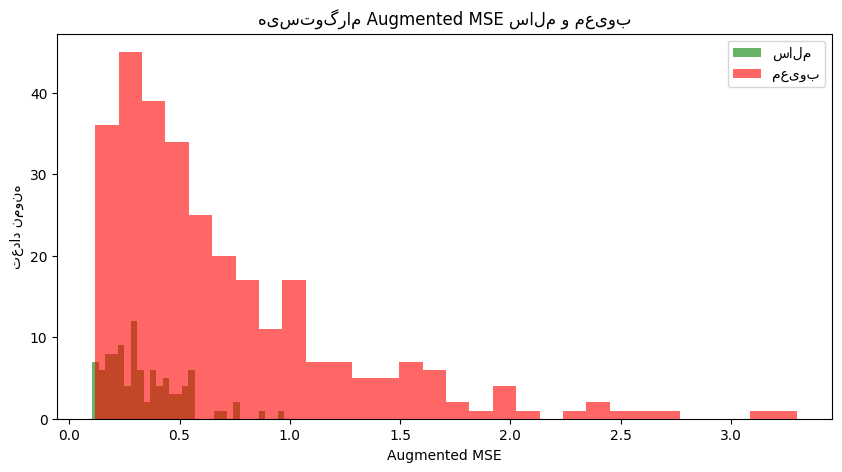

/tmp/ipython-input-2819316372.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([healthy_aug, defective_aug], labels=['سالم', 'معیوب'])


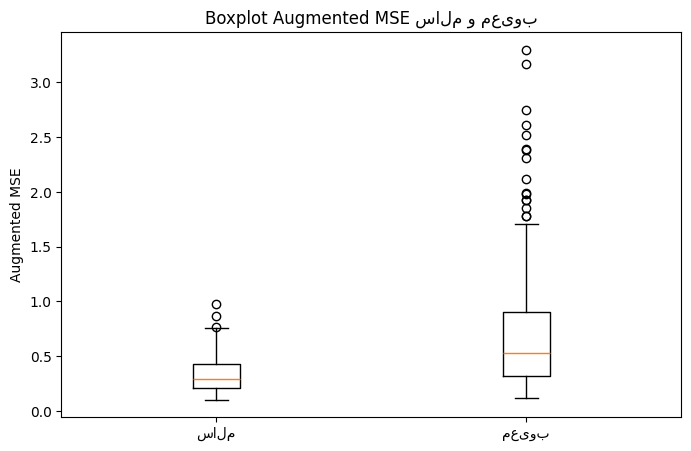

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# جمع‌آوری augmented_mse برای هر کلاس
healthy_aug = [x[-1] for i, x in enumerate(Total_Feature) if Total_Label_Feature[i] == '0']
defective_aug = [x[-1] for i, x in enumerate(Total_Feature) if Total_Label_Feature[i] == '1']

# -----------------------------
# 1. هیستوگرام
# -----------------------------
plt.figure(figsize=(10,5))
plt.hist(healthy_aug, bins=30, alpha=0.6, label='سالم', color='green')
plt.hist(defective_aug, bins=30, alpha=0.6, label='معیوب', color='red')
plt.xlabel('Augmented MSE')
plt.ylabel('تعداد نمونه')
plt.title('هیستوگرام Augmented MSE سالم و معیوب')
plt.legend()
plt.show()

# -----------------------------
# 2. Boxplot
# -----------------------------
plt.figure(figsize=(8,5))
plt.boxplot([healthy_aug, defective_aug], labels=['سالم', 'معیوب'])
plt.ylabel('Augmented MSE')
plt.title('Boxplot Augmented MSE سالم و معیوب')
plt.show()


In [ ]:
            avg_error,
            np.max(errors),
            np.std(errors),
            errors[-1],
            np.max(errors)/(avg_error + 1e-8),
            tail_mean,
            slope_penalty,
            augmented_mse

In [ ]:
Total_Feature[0]

[np.float64(0.053991157952993425),
 np.float64(0.2606369157456887),
 np.float64(0.07364951454725499),
 np.float64(0.09112610286885928),
 np.float64(4.827399102990478),
 np.float64(0.1334325540376126),
 np.float64(0.01608288336953148),
 np.float64(0.4864545868048942)]

In [ ]:
df2 = pd.DataFrame(Total_Feature , columns =['error','max' , 'std' , 'lst_error','ratio','tail_mean','slop','augment'])

In [ ]:
df2['label'] = Total_Label_Feature

In [ ]:
df_health_3 = df2[df2['label'] == '0']

In [ ]:
df_faultt_4 = df2[df2['label'] == '1']

In [ ]:
df_health_3

,error,max,std,lst_error,ratio,tail_mean,slop,augment,label
0,0.053991,0.260637,0.073650,0.091126,4.827399,0.133433,0.016083,0.486455,0
1,0.038880,0.138233,0.037891,0.054611,3.555394,0.067116,0.000000,0.240226,0
2,0.037194,0.184770,0.048625,0.184770,4.967673,0.080041,0.094623,0.466562,0
3,0.025801,0.129153,0.032281,0.033689,5.005698,0.056108,0.000000,0.194126,0
4,0.034882,0.128110,0.039825,0.016559,3.672705,0.065080,0.000000,0.230122,0
...,...,...,...,...,...,...,...,...,...
94,0.034386,0.142750,0.037604,0.142750,4.151434,0.069724,0.071006,0.385570,0
95,0.020791,0.088184,0.026773,0.001451,4.241468,0.035165,0.000000,0.126286,0
96,0.029772,0.143992,0.037044,0.143992,4.836547,0.062259,0.123636,0.463821,0
97,0.036248,0.309026,0.076301,0.034117,8.525265,0.081856,0.005830,0.293474,0


In [ ]:
df_health_3 = df2[df2['label'] == '0']


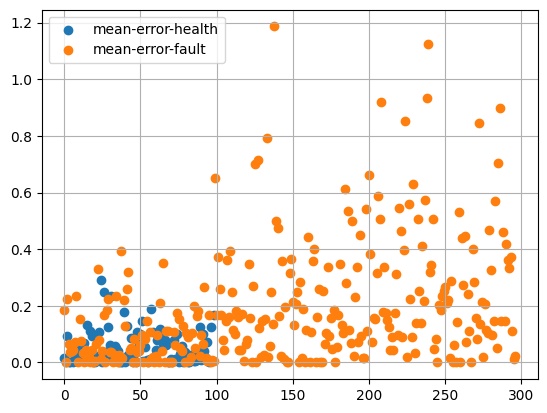

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(range(len(df_health)) , df_health_3['slop'] , label = 'mean-error-health')
plt.scatter(range(len(df_fault)) , df_faultt_4['slop'] , label = 'mean-error-fault')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

window_size = 2

# -------------------------------
# 1. آماده‌سازی داده‌های سالم
# -------------------------------
x_health_vec, y_health_vec, z_health_vec, errors_health_vec = [], [], [], []

for picture in z_health:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    for i in range(n_samples):
        x = picture_reshaped[i:i+window_size]
        y_true = picture_reshaped[i+window_size]

        y_pred = model.predict(np.expand_dims(x, axis=0), verbose=0)[0]
        error = np.sum((y_pred - y_true)**2)

        # بردارهای X,Y,Z برای رگرسیون
        for j in range(window_size):
            x_health_vec.append(x[j,0])
            y_health_vec.append(x[j,1])
            z_health_vec.append(x[j,2])
            errors_health_vec.append(error)

# -------------------------------
# 2. آماده‌سازی داده‌های معیوب (مثال: α)
# -------------------------------
x_alpha_vec, y_alpha_vec, z_alpha_vec, errors_alpha_vec = [], [], [], []

for picture in z_alpha:
    picture_reshaped = picture.reshape(16, 3)
    n_samples = picture_reshaped.shape[0] - window_size

    for i in range(n_samples):
        x = picture_reshaped[i:i+window_size]
        y_true = picture_reshaped[i+window_size]

        y_pred = model.predict(np.expand_dims(x, axis=0), verbose=0)[0]
        error = np.sum((y_pred - y_true)**2)

        for j in range(window_size):
            x_alpha_vec.append(x[j,0])
            y_alpha_vec.append(x[j,1])
            z_alpha_vec.append(x[j,2])
            errors_alpha_vec.append(error)

# -------------------------------
# 3. ساخت ماتریس X و بردار Y برای رگرسیون
# -------------------------------
X_health = np.stack([x_health_vec, y_health_vec, z_health_vec], axis=1)
y_health = np.array(errors_health_vec)

X_alpha = np.stack([x_alpha_vec, y_alpha_vec, z_alpha_vec], axis=1)
y_alpha = np.array(errors_alpha_vec)

# -------------------------------
# 4. برازش رگرسیون خطی
# -------------------------------
reg_health = LinearRegression().fit(X_health, y_health)
reg_alpha = LinearRegression().fit(X_alpha, y_alpha)

print("سالم - ضرایب a,b,c:", reg_health.coef_, "intercept:", reg_health.intercept_)
print("معیوب α - ضرایب a,b,c:", reg_alpha.coef_, "intercept:", reg_alpha.intercept_)

# -------------------------------
# 5. پیش‌بینی خطا و دسته‌بندی نمونه‌ها
# -------------------------------
def predict_error(X_vec, reg_model):
    return reg_model.predict(np.stack(X_vec, axis=1))

# مثال پیش‌بینی خطای یک تصویر سالم
X_test_example = np.array([[0.1, 0.2, 0.3], [0.2,0.1,0.3]])  # نمونه پنجره
pred_error = reg_health.predict(X_test_example)
print("خطای پیش‌بینی‌شده:", pred_error)


سالم - ضرایب a,b,c: [0.00639986 0.01483629 0.00280853] intercept: 0.003121606982089818
معیوب α - ضرایب a,b,c: [0.00647543 0.01633998 0.00547574] intercept: 0.0005265313843962754
خطای پیش‌بینی‌شده: [0.00757141 0.00672777]
